In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import os

In [2]:
path = os.path.dirname(os.getcwd())

In [4]:
df_nio = yf.download('NIO', start=date(1995,1,1))

[*********************100%***********************]  1 of 1 completed


In [6]:
from utils.util_funcs import build_columns_for_df, read_from_csv, save_to_csv



In [7]:
columns = build_columns_for_df(df_nio)
save_to_csv(df_nio, "NIO")
all_df = pd.DataFrame()
all_df["NIO"] = read_from_csv("NIO", columns)['Close']

In [8]:
all_df.head()

,NIO
Date,
2018-09-12,6.60
2018-09-13,11.60
2018-09-14,9.90
2018-09-17,8.50
2018-09-18,7.68


In [9]:
all_df.tail()

,NIO
Date,
2025-03-24,4.38
2025-03-25,4.39
2025-03-26,4.22
2025-03-27,3.98
2025-03-28,3.75


## Normalizations

<Axes: xlabel='Date'>

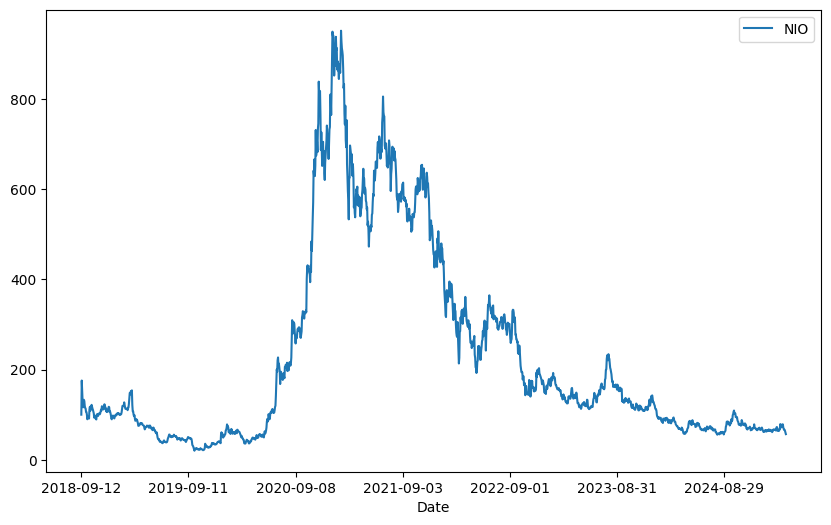

In [10]:
(all_df / all_df.iloc[0] * 100).plot(figsize=(10,6))

## Simple Rate of Return

P1 - P0 / P0 = P1 / P0 = 1

In [11]:
returns = (all_df / all_df.shift(1)) - 1
returns.head()

,NIO
Date,
2018-09-12,NaN
2018-09-13,0.757576
2018-09-14,-0.146552
2018-09-17,-0.141414
2018-09-18,-0.096471


In [12]:
# Calculate annual return
annual_returns = returns.mean() * 250
print(annual_returns)

NIO    0.294241
dtype: float64


In [15]:
# Estimation the avg for PG
ticker_NIO = str(round(annual_returns, 5) * 100) + ' %'
print(ticker_NIO)

NIO    29.424
dtype: float64 %
